# Data Cleaning
Read in and merge the two data sets (tip: think of different CSV formats that exist)

Clean the data: remove impossible values
Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
Show the head() of the resulting data frame

# 1. 

At first we import the plotting libraries, pandas and upload the csv files

In [57]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('survey.csv')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [41]:
df2 = pd.read_csv('steps.csv', sep = ';')
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The two datasets are known, we can merge them -> ID is a common identifier 

In [42]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the following we are going to clean the data, first unrealistic data will be cut

In [43]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


outliers were filtered out, here weight over 200kg and 35kg seemed unrealistic. A height over 250cm and under 100cm also seemed unrealistic

In [73]:
# cleaning unrealistic weights 
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
# cleaning unrealistic height 
df = df[(df["height"] < 250) & (df["height"] > 100)]
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,size_p,bmi,mean_steps,lazy_days
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.381343,30.930438,5133.875000,163
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,79.046190,23.765432,2826.371951,165
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,6227.0,4567.0,2567.0,1129.0,0.0,79.046190,25.617284,3745.902439,180
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.381343,25.249337,221.536585,308
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.224680,21.872423,874.557927,274


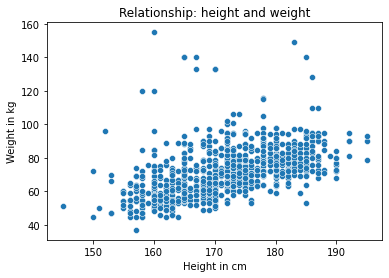

In [75]:
sns.scatterplot(x="height", y="weight", data=df)
plt.title("Relationship: height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

# Create Custom Variables
- BMI
- Mean steps per participant
- "Lazy days" / total inactive days per participant

In [76]:
df = df
df = df.fillna(0)
# Add BMI as dependant variable 
df["bmi"] = df["weight"]/((df["height"]/100)*df["height"]/100)

# Add mean_steps
for i in df["id"]:
    # defining regex date format to select all columns with relevant data (so data could be added)
    match_date_format = '^([0-3]?\d\-{1})([01]?\d\-{1})([12]{1}\d{3}\-?)'
    df["mean_steps"] = df.loc[:, df.columns.str.match(match_date_format)].mean(axis=1)
    
# Add lazy_days
for i in df["id"]:
  df['lazy_days'] = (df == 0).sum(axis = 1)    

In [77]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,size_p,bmi,mean_steps,lazy_days
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.381343,30.930438,5133.875000,163
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,79.046190,23.765432,2826.371951,165
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,6227.0,4567.0,2567.0,1129.0,0.0,79.046190,25.617284,3745.902439,180
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.381343,25.249337,221.536585,308
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.224680,21.872423,874.557927,274


# 3. Exploratory Data Analysis
Do your exploratory data analysis to determine what variables you want to use and how.

Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
Describe and interpret the results

See last week for the first part (distribution of steps). In addition:

Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results
An analysis of mean steps per participant:
Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
To gain an initial overview, I have plotted a summary of all participants and their mean steps.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


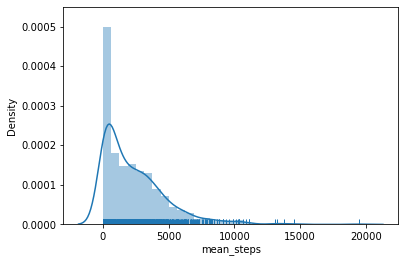

In [62]:
sns.distplot(df.mean_steps, rug=True)
plt.show()

-> Right skewed, At the start a very high number is indicated - these are a lot of participants with only a few steps and only very few around 7000 to 10000 steps, to delete the small numbers the dataframe can be adapted to >70 

In [63]:
df = df[df.mean_steps > 70.0]

# Mean relationship with gender
The catplot shows that tyere are a few outliers for the mean steps for female. The common mean is around 1000 to 2500 for both gender. The difference is not that big.

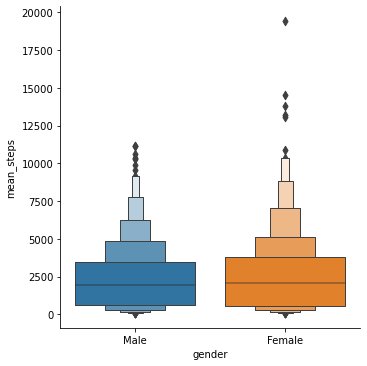

In [84]:
sns.catplot(x="gender", y="mean_steps", kind="boxen", data=df)


# Impact of education

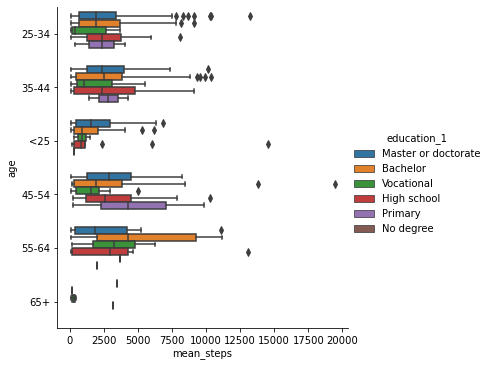

In [85]:
sns.catplot(x='mean_steps', y='age', data=df, kind="box", hue='education_1')

In [86]:
df_mean = df['education_1'].sort_values(ascending = False)

df_mean

696    Vocational
628    Vocational
508    Vocational
438    Vocational
94     Vocational
          ...    
266      Bachelor
580      Bachelor
575      Bachelor
270      Bachelor
658      Bachelor
Name: education_1, Length: 856, dtype: object

# Scatterplot Matrix
vizualizes multivariate data, good overview on relationships. 
Here, the Matrix weight on BMI - what is very obvious. Anoother interesting correlation is lazy days on mean steps

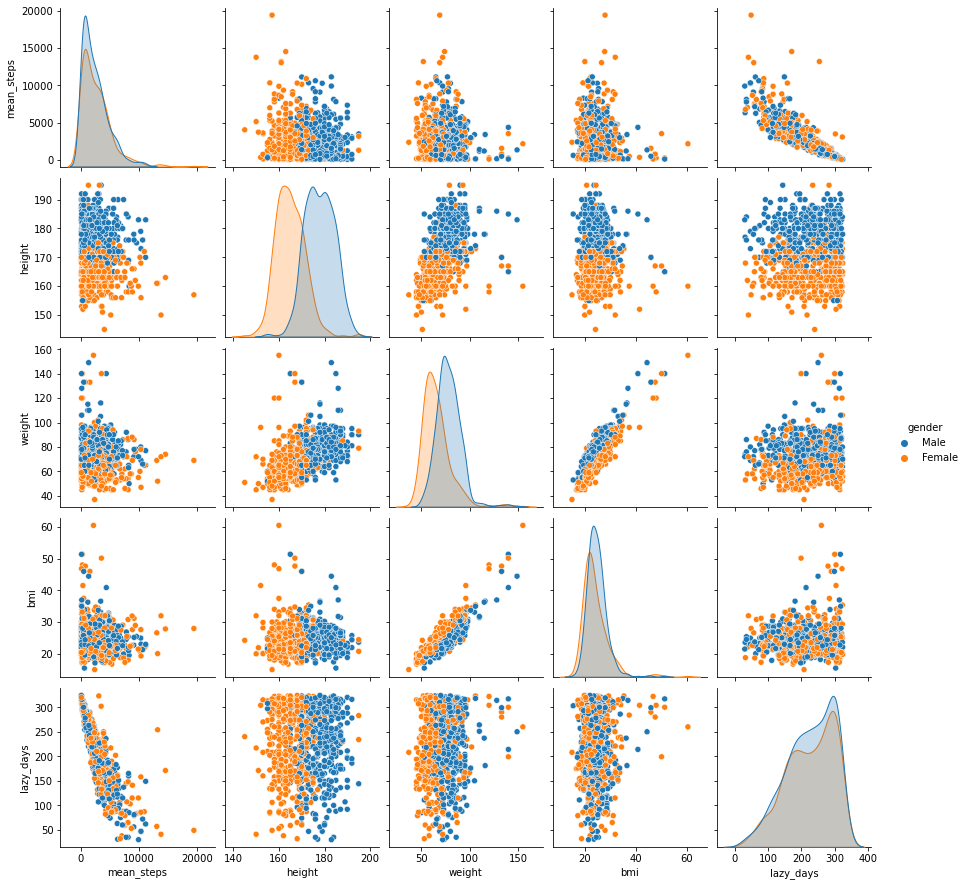

In [90]:
df_sel = df[['mean_steps','height','weight', 'gender', 'bmi','lazy_days']]
sns.pairplot(df_sel, hue ='gender')
plt.show() 

# Linear regression
variables related to each other - I will test weight based on lazy days , believing that more lazy days will lead to a higher weight 

In [91]:
from sklearn.linear_model import LinearRegression
lz = df[['lazy_days']] 
w = df['weight']
lm = LinearRegression() 
lm.fit(lz, w) 

b0 = lm.intercept_ 
b1 = lm.coef_[0]

df["pd_weight"] = lm.predict(lz) 
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,size_p,bmi,mean_steps,lazy_days,pd_weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.381343,30.930438,5133.875000,163,71.210168
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79.046190,23.765432,2826.371951,165,71.239981
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,6227.0,4567.0,2567.0,1129.0,0.0,79.046190,25.617284,3745.902439,180,71.463573
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.381343,25.249337,221.536585,308,73.371561
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,68.224680,21.872423,874.557927,274,72.864752


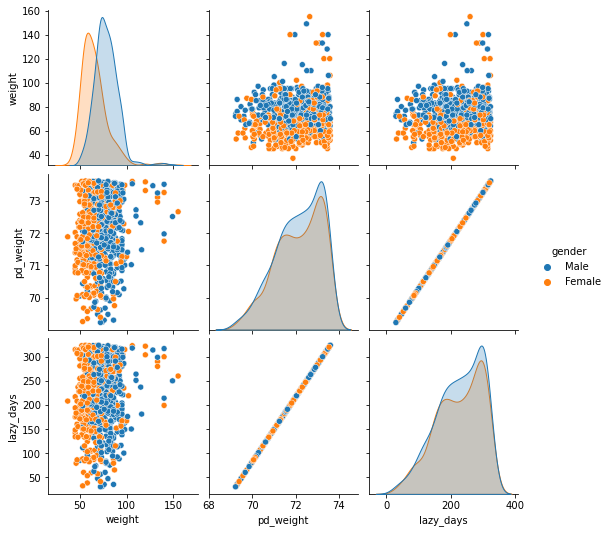

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,10-5-2014,11-5-2014,12-5-2014,13-5-2014,size_p,bmi,mean_steps,lazy_days,pd_weight,residual
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,...,856.000000,856.000000,856.000000,856.0,856.000000,856.000000,856.000000,856.000000,856.000000,8.560000e+02
mean,463.716121,2.343458,2.528037,171.700935,72.137850,102.123832,2528.674065,3490.260514,2544.864486,3298.316589,...,765.043224,638.038551,567.542056,0.0,72.137850,24.401077,2530.160588,225.234813,72.137850,-7.022420e-15
std,267.204843,1.226903,1.269216,9.042036,15.113362,884.360553,5295.368163,6207.901560,5289.705591,5289.875569,...,2877.086494,3262.697403,2367.164227,0.0,7.526806,4.591160,2415.633237,70.811287,1.055524,1.507646e+01
min,1.000000,1.000000,1.000000,145.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,49.911356,15.010751,70.201220,30.000000,69.227649,-3.488095e+01
25%,233.750000,1.000000,2.000000,165.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,66.559833,21.610843,595.942835,175.000000,71.389042,-1.082408e+01
50%,464.500000,2.000000,2.000000,172.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,72.386800,23.529412,1964.067073,235.500000,72.290865,-8.871113e-01
75%,692.250000,3.000000,4.000000,179.000000,81.000000,0.000000,1899.000000,5860.750000,2845.250000,6370.000000,...,0.000000,0.000000,0.000000,0.0,78.213767,26.351271,3671.520579,289.000000,73.088344,8.688893e+00
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,27605.000000,36031.000000,33660.000000,0.0,91.532548,60.546875,19430.237805,324.000000,73.610060,8.234393e+01


In [98]:
df["residual"] = df["weight"] - df["pd_weight"]

df_sel = df[[ 'weight','pd_weight','lazy_days', 'gender']]

sns.pairplot(df_sel, hue="gender")
plt.show()
df.describe()

# Evaluate


In [99]:
r2_score(df['weight'], df['pd_weight']) #this gives the model fit (R2) for the Y and predicted Y


0.0048776906057460545

R squared: 0.0048777

In [100]:
math.sqrt(mean_squared_error(df['weight'], df['pd_weight']))

15.067649291809158

RSME = 15.07

Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable.
The R-Square value is very small which interpretes in a small extent of the weight varience 

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 
15 is inaccurate for the model.
